<div class='alert alert-info'>
    <h2>Agrupación categórica</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middel', 'Rich']

In [3]:
n = 500 # size dataframe

gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    


In [4]:
# n = media + desviación * distribución
height = (160 + 30*np.random.randn(n)).astype(int)
weight = (65 + 25*np.random.randn(n)).astype(int)
age = (30 + 12*np.random.randn(n)).astype(int)
income = 18000 + 3500*np.random.randn(n)

In [5]:
data = pd.DataFrame(
    {
        'Gender': gender_data,
        'Economic Status': income_data,
        'Height': height,
        'Weight': weight,
        'Age': age,
        'Income': income
    }
)

data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,126,70,32,27195.557694
1,Male,Rich,128,64,31,14716.845363
2,Male,Middel,155,65,26,16877.992253
3,Male,Rich,207,95,16,17641.452131
4,Male,Rich,150,-4,25,14251.456950


In [6]:
gruped_gender = data.groupby('Gender')

gruped_gender.groups

{'Female': Int64Index([  0,   5,   8,   9,  11,  12,  13,  16,  18,  19,
             ...
             472, 473, 474, 475, 481, 487, 488, 491, 496, 497],
            dtype='int64', length=249),
 'Male': Int64Index([  1,   2,   3,   4,   6,   7,  10,  14,  15,  17,
             ...
             485, 486, 489, 490, 492, 493, 494, 495, 498, 499],
            dtype='int64', length=251)}

In [7]:
for names, groups in gruped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status  Height  Weight  Age        Income
0    Female            Rich     126      70   32  27195.557694
5    Female          Middel     180      93   24  16381.621269
8    Female            Poor     164      56   13   8784.422312
9    Female            Rich     163     103   20  18776.337692
11   Female            Poor     182      86   23  18835.500330
12   Female            Poor     176      56   36  20774.277470
13   Female          Middel     177      63   26  17354.802322
16   Female          Middel     182      96   31  14743.540362
18   Female          Middel     192      28   49  23498.207965
19   Female            Poor     129      84   37  16375.019775
20   Female            Rich     133      56   13  16186.939195
22   Female            Rich     181      30    6  17976.909871
26   Female          Middel     127      45   44  21536.226505
27   Female          Middel     159      64   42  14745.465634
28   Female          Middel     155      42   42

In [8]:
gruped_gender.get_group('Female').head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,126,70,32,27195.557694
5,Female,Middel,180,93,24,16381.621269
8,Female,Poor,164,56,13,8784.422312
9,Female,Rich,163,103,20,18776.337692
11,Female,Poor,182,86,23,18835.500330


## Doble agrupación

In [9]:
double = data.groupby(['Gender', 'Economic Status'])
for names, groups in double:
    print(names)

('Female', 'Middel')
('Female', 'Poor')
('Female', 'Rich')
('Male', 'Middel')
('Male', 'Poor')
('Male', 'Rich')


<div class='alert alert-success'>
    <h3>Operaciones sobre datos agrupados.</h3>
</div>

In [10]:
double.sum()

Height  Weight   Age        Income
Gender Economic Status                                    
Female Middel            14136    5632  2631  1.484816e+06
       Poor              11758    4821  2173  1.321527e+06
       Rich              14146    5605  2554  1.609686e+06
Male   Middel            10906    4268  1962  1.225098e+06
       Poor              15213    5987  2833  1.744346e+06
       Rich              14401    5810  2643  1.578454e+06

In [11]:
double.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middel           162.482759  64.735632  30.241379  17066.847504
       Poor             156.773333  64.280000  28.973333  17620.363489
       Rich             162.597701  64.425287  29.356322  18502.135986
Male   Middel           162.776119  63.701493  29.283582  18285.045806
       Poor             163.580645  64.376344  30.462366  18756.410591
       Rich             158.252747  63.846154  29.043956  17345.647756

In [12]:
double.size()

Gender  Economic Status
Female  Middel             87
        Poor               75
        Rich               87
Male    Middel             67
        Poor               93
        Rich               91
dtype: int64

In [13]:
double.describe()

Height                                              \
                        count        mean        std    min    25%    50%   
Gender Economic Status                                                      
Female Middel            87.0  162.482759  27.372904   83.0  145.0  162.0   
       Poor              75.0  156.773333  30.445598   56.0  135.5  154.0   
       Rich              87.0  162.597701  27.934500   90.0  147.5  162.0   
Male   Middel            67.0  162.776119  28.146705  108.0  141.5  164.0   
       Poor              93.0  163.580645  30.923230   91.0  142.0  166.0   
       Rich              91.0  158.252747  28.816891   70.0  141.5  159.0   

                                     Weight             ...   Age        \
                          75%    max  count       mean  ...   75%   max   
Gender Economic Status                                  ...               
Female Middel           180.5  225.0   87.0  64.735632  ...  38.5  73.0   
       Poor             172.5  222.0   75.0  64.280000  ...  37.5  62.0   
       Rich             181.5  239.0   87.0  64.425287  ...  39.5  55.0   
Male   Middel           182.0  233.0   67.0  63.701493  ...  37.0  56.0   
       Poor             183.0  247.0   93.0  64.376344  ...  38.0  58.0   
       Rich             176.5  223.0   91.0  63.846154  ...  38.0  66.0   

                       Income                                           \
                        count          mean          std           min   
Gender Economic Status                                                   
Female Middel            87.0  17066.847504  3860.469921   5282.813678   
       Poor              75.0  17620.363489  3914.423438   8784.422312   
       Rich              87.0  18502.135986  3705.276828  10102.454884   
Male   Middel            67.0  18285.045806  3637.560784  10025.835403   
       Poor              93.0  18756.410591  3247.276701  11112.941861   
       Rich              91.0  17345.647756  3333.894953   8518.003071   

                                                                                
                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middel           14744.502998  16777.281237  19804.828547  25256.834515  
       Poor             14807.414758  17728.768190  20709.107405  27151.149183  
       Rich             16195.396773  18094.704279  20979.723195  27195.557694  
Male   Middel           16003.581321  17491.833206  20744.220324  26723.954342  
       Poor             16827.094529  18815.360595  20972.438583  27411.766268  
       Rich             15286.657494  17364.676747  19707.931397  25478.799493  

[6 rows x 32 columns]

In [14]:
gruped_income = double['Income']
gruped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middel            87.0  17066.847504  3860.469921   5282.813678   
       Poor              75.0  17620.363489  3914.423438   8784.422312   
       Rich              87.0  18502.135986  3705.276828  10102.454884   
Male   Middel            67.0  18285.045806  3637.560784  10025.835403   
       Poor              93.0  18756.410591  3247.276701  11112.941861   
       Rich              91.0  17345.647756  3333.894953   8518.003071   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middel           14744.502998  16777.281237  19804.828547  25256.834515  
       Poor             14807.414758  17728.768190  20709.107405  27151.149183  
       Rich             16195.396773  18094.704279  20979.723195  27195.557694  
Male   Middel           16003.581321  17491.833206  20744.220324  26723.954342  
       Poor             16827.094529  18815.360595  20972.438583  27411.766268  
       Rich             15286.657494  17364.676747  19707.931397  25478.799493

In [15]:
double.aggregate(
    {
        'Income': np.sum,
        'Age': np.mean,
        'Height': np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middel           1.484816e+06  30.241379  27.372904
       Poor             1.321527e+06  28.973333  30.445598
       Rich             1.609686e+06  29.356322  27.934500
Male   Middel           1.225098e+06  29.283582  28.146705
       Poor             1.744346e+06  30.462366  30.923230
       Rich             1.578454e+06  29.043956  28.816891

In [16]:
double.aggregate(
    {
        'Age': np.mean,
        'Height': lambda h: np.mean(h) / np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middel           30.241379  5.970309
       Poor             28.973333  5.183970
       Rich             29.356322  5.854420
Male   Middel           29.283582  5.826779
       Poor             30.462366  5.318567
       Rich             29.043956  5.522091

In [17]:
double.aggregate([np.sum, np.mean])

Height             Weight              Age             \
                          sum        mean    sum       mean   sum       mean   
Gender Economic Status                                                         
Female Middel           14136  162.482759   5632  64.735632  2631  30.241379   
       Poor             11758  156.773333   4821  64.280000  2173  28.973333   
       Rich             14146  162.597701   5605  64.425287  2554  29.356322   
Male   Middel           10906  162.776119   4268  63.701493  1962  29.283582   
       Poor             15213  163.580645   5987  64.376344  2833  30.462366   
       Rich             14401  158.252747   5810  63.846154  2643  29.043956   

                              Income                
                                 sum          mean  
Gender Economic Status                              
Female Middel           1.484816e+06  17066.847504  
       Poor             1.321527e+06  17620.363489  
       Rich             1.609686e+06  18502.135986  
Male   Middel           1.225098e+06  18285.045806  
       Poor             1.744346e+06  18756.410591  
       Rich             1.578454e+06  17345.647756

<div class='alert alert-success'>
    <h3>Filtrado de Datos.</h3>
</div>

In [18]:

double['Age'].filter(lambda x: x.sum() > 2400);

In [19]:
# Transformación
zscore = lambda h: np.mean(h) / np.std(h)
double.transform(zscore).head()

,Height,Weight,Age,Income
0,5.854420,2.317660,2.275504,5.022404
1,5.522091,2.839361,2.325720,5.231642
2,5.826779,2.597695,2.505332,5.064671
3,5.522091,2.839361,2.325720,5.231642
4,5.522091,2.839361,2.325720,5.231642


<div class='alert alert-success'>
    <h3>Conjunto de entrenamiento y testing.</h3>
</div>

In [20]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
len(data)

3333

## Dividir con distribución normal

In [21]:
a = np.random.randn(3333)
check = (a<0.8)
check

array([ True,  True, False, ...,  True,  True,  True])

(array([ 686.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2647.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

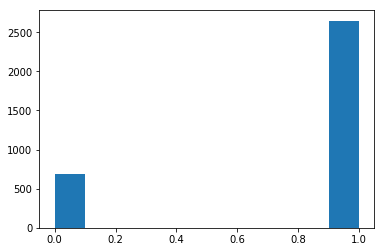

In [22]:
plt.hist(check.astype(int))

Vemos que aproximadamente el 80% esta en True y el resto en False

In [23]:
training = data[check]
testing = data[~check]

In [24]:
print(len(training))
print(len(testing))
print(len(testing)/3333)

2647
686
0.20582058205820583


## Usando sklearn

In [25]:
# Validación cruzada

train, test = train_test_split(data, test_size = 0.2)

In [26]:
len(train)

2666

## Usando función shuffle

In [27]:
from sklearn.utils import shuffle
data = shuffle(data);

In [28]:
train_data = data[:int(0.75*len(data))]
test_data = data[int(0.75*len(data))+1:]

<div class='alert alert-success'>
    <h3>Concatenar dataSets</h3>
</div>

In [29]:
red_wine = pd.read_csv('../datasets/wine/winequality-red.csv', sep=';')
white_wine = pd.read_csv('../datasets/wine/winequality-white.csv', sep=';')

In [30]:
 print('Wine red', red_wine.shape)
 print('Wine white', white_wine.shape)

Wine red (1599, 12)
Wine white (4898, 12)


In [31]:
# Concatenamos por filas para que quede uno debajo del otro ( APILAMIENTO )
wine_data = pd.concat([red_wine, white_wine], axis=0)
print(wine_data.shape)
wine_data[1598: 1601]

(6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1598,6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6


In [32]:
data1 = wine_data.head(10)
data2 = wine_data[300: 310]
data3 = wine_data.tail(10)

wine_scramble = pd.concat([data1, data2, data3])
wine_scramble.shape

(30, 12)

<div class='alert alert-success'>
    <h3>Carga de datos Distribuidos</h3>
</div>

* Importamos el primer fichero.
* Hacer bucle para recorrer todos los ficheros.
    * Cada uno se agrega al final del primer fichero.
    

In [33]:
filepath = '../datasets/distributed-data/'

aire = pd.read_csv('../datasets/distributed-data/001.csv')
# Elimino filas que no tienen datos
aire = aire.dropna(axis=0)

final_length = len(aire)

for i in range(2, 333):
    if i < 10:
        filename = '00' + str(i) + '.csv'
    elif i < 100:
        filename = '0' + str(i) + '.csv'
    else:
        filename = str(i) + '.csv'
    
    file = filepath + filename
    
    temp = pd.read_csv(file)
    temp = temp.dropna(axis=0)
    final_length += len(temp)
    
    aire = pd.concat([aire, temp], axis=0)
    

In [34]:
print('Total de filas no nulas', final_length)
print('Forma dataSet', aire.shape)

Total de filas no nulas 111802
Forma dataSet (111802, 4)


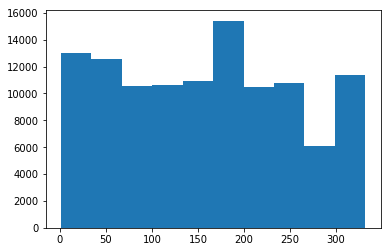

In [35]:
plt.hist(aire['ID']);

<div class='alert alert-success'>
    <h3>Joins DataSets
    </h3>
</div>

In [41]:
filepath = '../datasets/athletes/'

medals = pd.read_csv(filepath + 'Medals.csv', encoding='ISO-8859-1')
medals.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [38]:
country = pd.read_csv(filepath + 'Athelete_Country_Map.csv', encoding='ISO-8859-1')
country.shape

(6970, 2)

In [39]:
sport = pd.read_csv(filepath + 'Athelete_Sports_Map.csv', encoding='ISO-8859-1')
sport.shape

(6975, 2)

In [40]:
# Uniendo medallas con pais
medals_country = pd.merge(left=medals, right=country, left_on='Athlete', right_on='Athlete')
medals_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [42]:
medals_country.shape

(8657, 9)

Como hay atletas que pertenecen a más de un país, tenemos que el "merge" duplica en esos casos la información como podemos ver a continuación.

In [44]:
medals_country[medals_country['Athlete'] == 'Aleksandar Ciric']

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1503,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1504,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia and Montenegro
1505,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1506,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia and Montenegro
1507,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia
1508,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia and Montenegro


Como vemos dice que jugo en el mismo año por dos paises distintos.  Para evitar eso, necesitamos que los dataset tengan relaciones uno a uno, así que eliminamos los datos donde no sea así en el dataset original.

In [45]:
country = country.drop_duplicates(subset='Athlete')

In [46]:
medals_country = pd.merge(left=medals, right=country, left_on='Athlete', right_on='Athlete')
medals_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [47]:
medals_country.shape

(8618, 9)

Vemos que ahora tenemos menos datos.

Hacemos lo mismo con los deportes

In [48]:
sport = sport.drop_duplicates(subset='Athlete')

In [50]:
atletas = pd.merge(left=medals_country, right=sport, left_on='Athlete', right_on='Athlete')
print(atletas.shape)
atletas.head()

(8618, 10)


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


<div class='alert alert-success'>
    <h3>Tipos de Join</h3>
</div>

In [51]:
from IPython.display import Image

### INNER JOIN
* Devuelve un data frame con las filas que tienen valor en ambos data frames que estamos uniendo.
* El número de filas será igual al número de filas comunes que tengan ambos data sets.
    * Data set A tiene 60 filas.
    * Data set B tiene 50 filas.
    * Ambos comparten 30 filas.
    * Entonces A inner join B tendrá 30 filas.
* Se trata de una intersección de conjuntos.

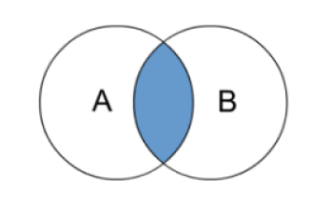

In [53]:
Image(filename='../resourses/inner-join.png')

### LEFT JOIN
* Devuelve un dataframe con las filas que tuvieran valor en el dataset de la izquierda sin importar si tienen correspondencia en el de la derecha.
* LAs filas del dataframe final que no correspondan a ninguna fila del dataframe derecho, tendran NaN en las columnas del dataframe derecho.
* El número de filas será igual al del dataframe izquierdo.
* Es el dataframde izquierdo más la intersección.

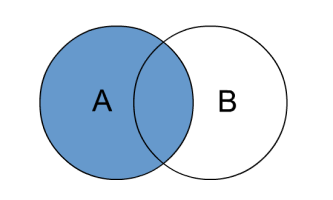

In [54]:
Image(filename='../resourses/left-join.png')

### RIGHT JOIN
Lo mismo que el Left join pero esta vez a la derecha.

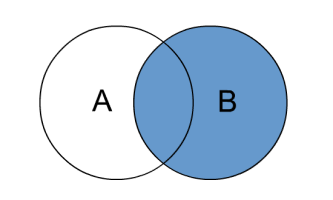

In [55]:
Image(filename='../resourses/right-join.png')

### OUTER JOIN (full join)
* Devuelve un dataframe con todas las filas de ambos, reemplazando las ausencias de uno u otro con NaN.
* El número de filas será igual al máximo número de filas de ambos.
    * Data set A con 60 filas.
    * Data set B con 50 filas.
    * Ambos comparte 30 filas.
    * Entonces A outer join B tendrá 60 + 50 - 30 = 80 filas
* Se trata de una unión de conjuntos.

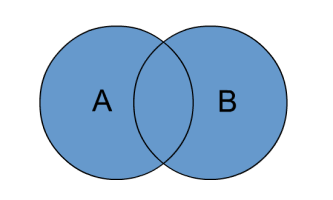

In [56]:
Image(filename='../resourses/outer-join.png')